## PROJECT TITLE: CUSTOMER TRANSACTIONS

#### Data Analysis by: Kwabena Boateng

#### IMPORT LIBRARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

#from sklearn.preprocessing import LabelEncoder 

#### LOAD DATASET

In [2]:
customer_transactions = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/DATA ANALYSIS/PERSONAL/CUSTOMER TRANSACTIONS PROJECT/sample_dataset.csv")

customer_transactions

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


#### DATA UNDERSTANDING

The dataset used for this project is stored in the data/ directory. The data consists of customer transaction records with the following columns:

* customer_id: Unique identifier for each customer.
* Name: First name of the customer.
* Surname: Last name of the customer.
* Gender: the sexual orientation of the customer.
* Birthdate: the day, month and year the customer was born.
* Transaction Amount: Amount of transaction made.
* Date: Date of the transaction.
* Merchant Name: the name of the merchant making the transactions.
* Category: Product category.

## DATA PREPARATION

#### CHECK THE SHAPE

In [3]:
print('The number of rows and columns in this dataset is', customer_transactions.shape, 'respectively')

The number of rows and columns in this dataset is (50000, 9) respectively


#### CHECK THE SIZE

In [4]:
print('The size in this dataset is', customer_transactions.size) 
print()
print('This means, there are', customer_transactions.size, 'elements in this dataset.')

The size in this dataset is 450000

This means, there are 450000 elements in this dataset.


#### CHECK THE COLUMNS

In [5]:
customer_transactions.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

#### CHECK THE DATA TYPES

In [6]:
customer_transactions.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Birthdate              object
Transaction Amount    float64
Date                   object
Merchant Name          object
Category               object
dtype: object

#### CHECK INFO

In [7]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


#### TASK 1 - CHECK FOR DUPLICATED ROWS

In [8]:
Total_dup = customer_transactions.duplicated().sum()
print('The total number of duplicate rows in this dataset is', Total_dup)

The total number of duplicate rows in this dataset is 0


#### TASK 2 - CHECK FOR MISSING VALUES

In [9]:
customer_transactions.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [10]:
Total_MV = customer_transactions.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

The total number of missing values in this dataset is 5047


In [11]:
#Check for the percentage for the missing values.

missing_gender = customer_transactions['Gender'].isnull().sum()
total_rows = len(customer_transactions)
missing_percentage = (missing_gender / total_rows) * 100

print(f"Missing Gender Values: {missing_gender} ({missing_percentage:.2f}%)")

Missing Gender Values: 5047 (10.09%)


#### HEATMAP FOR MISSING VALUES

<AxesSubplot: >

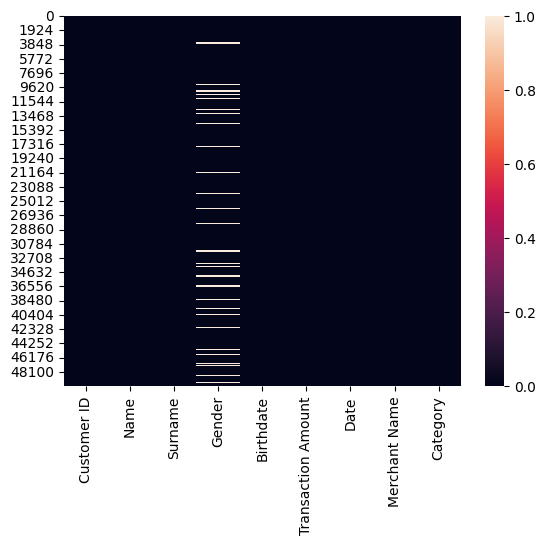

In [12]:
sns.heatmap(customer_transactions.isnull())

#### INSIGHTS

The results showed that there are 5,047 missing values in the gender column which sums up to 10.09% of the dataset. 

In dealing with this, I will replace all the missing values in the gender column to UNDEFINED.

This presupposes that the these customers did not find their gender orientation listed in there to select, hence the empty field.

#### DEALING WITH THE MISSING VALUES.

In [13]:
#Replace missing values in the gender column with undefined.

customer_transactions['Gender'].fillna('Undefined', inplace=True)

In [14]:
#Replace gender initials with the full word.

customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')

In [15]:
#Checking for the unique values in the Gender column after replacing the missing values and renaming the initials with full word.
customer_transactions['Gender'].unique()

array(['Female', 'Undefined', 'Male'], dtype=object)

#### RENAME SOME COLUMNS NAME

In [16]:
customer_transactions = customer_transactions.rename(columns={'Name': 'First Name', 'Surname': 'Last Name', 
                                                              'Birthdate': 'Date of Birth', 
                                                              'Transaction Amount': 'Transaction Amt ($)'})

In [17]:
customer_transactions.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Gender', 'Date of Birth',
       'Transaction Amt ($)', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

#### CHECK THE 

In [18]:
customer_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,50000.0,500136.796960,288232.431640,29.00,251191.5000,499520.500,749854.250,999997.00
Transaction Amt ($),50000.0,442.119239,631.669724,5.01,79.0075,182.195,470.515,2999.88


In [19]:
customer_transactions.describe(include='object').T

,count,unique,top,freq
First Name,50000,690,Michael,1167
Last Name,50000,1000,Smith,1095
Gender,50000,3,Female,22713
Date of Birth,50000,58,1954-11-01,914
Date,50000,287,2023-06-30,200
Merchant Name,50000,36939,Smith Ltd,69
Category,50000,6,Restaurant,8413


## EXPLORATORY DATA ANALYSIS, (E.D.A)

#### MAKE A COPY OF THE ORIGINAL DATASET.

In [20]:
customer_transactions_copy = customer_transactions.copy

In [21]:
Cols_drop = ['Customer ID', 'Last Name']
customer_transactions = customer_transactions.drop(columns= Cols_drop)

<AxesSubplot: >

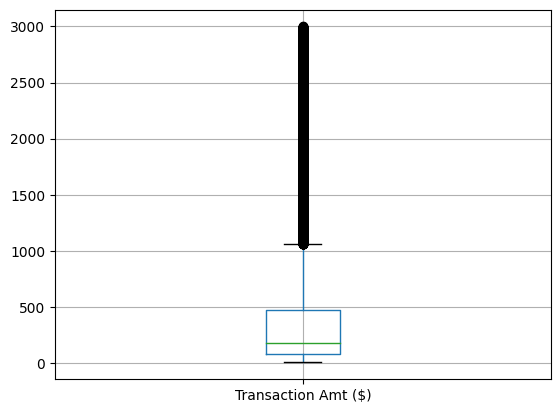

In [22]:
customer_transactions.boxplot()

#### INSIGHTS TO BE DERIVED FROM THIS ANALYSIS

#### QUESTIONS

 - Which category made the highest sales during the period?
 - Which age grouping patronized more of cosmetics, clothings and travel?
 - Which date had the highest patronage for Clothing?

#### Question 1
 - Which category made the highest sales during the period?

In [23]:
# Group the data by category and calculate total sales for each category
category_sales = customer_transactions.groupby('Category')['Transaction Amt ($)'].sum()

# Print the total sales for each category
print(category_sales)

Category
Clothing        1319342.47
Cosmetic         876672.44
Electronics     4394092.10
Market          2151134.42
Restaurant       464488.60
Travel         12900231.94
Name: Transaction Amt ($), dtype: float64


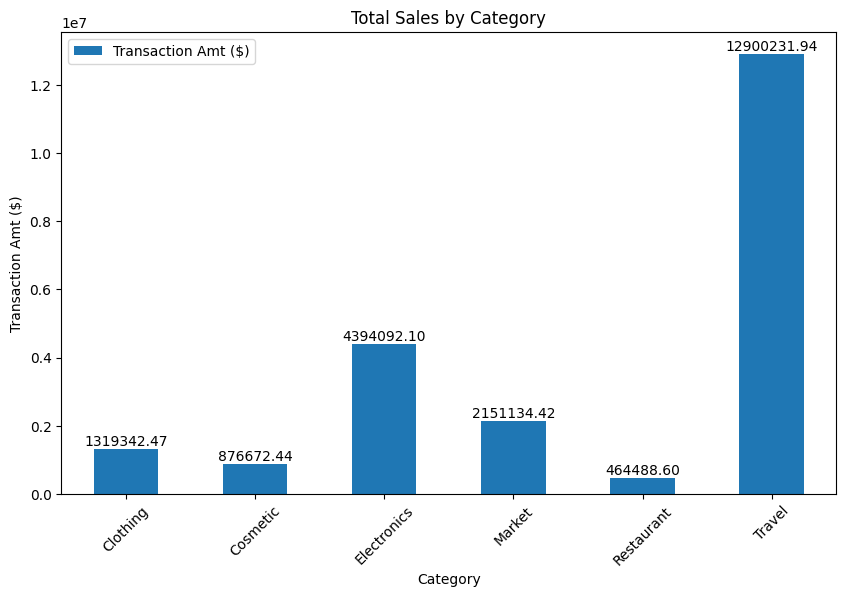

In [24]:
# Plot a bar chart to visualize the results
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amt ($)')
plt.xticks(rotation=45)

plt.legend()

# Add labels on top of the bars
for i, v in enumerate(category_sales):
    plt.text(i, v + 200, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [25]:
# Find the category with the highest total sales
highest_sales_category = category_sales.idxmax()
highest_sales_amount = category_sales.max()

print(f"The category with the highest sales is '{highest_sales_category}' with a total sales amount of $ {highest_sales_amount:.2f}")

The category with the highest sales is 'Travel' with a total sales amount of $ 12900231.94


#### Question 2
 - Which age group patronized more of cosmetics, clothings and travel?

In [26]:
# Convert the 'Date of Birth' column to datetime
customer_transactions['Date of Birth'] = pd.to_datetime(customer_transactions['Date of Birth'])

# Calculate age based on the current date
current_date = datetime.now()
customer_transactions['Age'] = (current_date - customer_transactions['Date of Birth']) // pd.Timedelta(days=365)

customer_transactions

,First Name,Gender,Date of Birth,Transaction Amt ($),Date,Merchant Name,Category,Age
0,Sean,Female,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21
1,Michelle,Undefined,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38
2,Jacob,Male,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42
3,Nathan,Male,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46
4,Crystal,Female,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72
...,...,...,...,...,...,...,...,...
49995,Christine,Female,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market,26
49996,Anna,Female,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic,24
49997,Nicole,Male,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market,44
49998,Maria,Male,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market,42


In [27]:
# Group Ages into categories: young, middle age, and old

# Define age bins and labels
age_bins = [0, 30, 50, 100]  # You can adjust these age boundaries as needed

age_labels = ['Young', 'Middle Age', 'Old']

# Apply age grouping
customer_transactions['Age Group'] = pd.cut(customer_transactions['Age'], bins=age_bins, labels=age_labels, right=False)


In [28]:
customer_transactions.head()

,First Name,Gender,Date of Birth,Transaction Amt ($),Date,Merchant Name,Category,Age,Age Group
0,Sean,Female,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,21,Young
1,Michelle,Undefined,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,Middle Age
2,Jacob,Male,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,42,Middle Age
3,Nathan,Male,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,Middle Age
4,Crystal,Female,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,72,Old


In [29]:
# Filter the data for the specified products
products_of_interest = ['Cosmetic', 'Clothing', 'Travel']  # Use correct case for column names
filtered_data = customer_transactions[customer_transactions['Category'].isin(products_of_interest)]

# Group the data by age group and count the number of purchases in each category
grouped_data = filtered_data.groupby(['Age Group', 'Category']).size().unstack().fillna(0)

# Find the age group that patronized each category the most
most_patronized_travel = grouped_data['Travel'].idxmax()
most_patronized_clothing = grouped_data['Clothing'].idxmax()
most_patronized_cosmetics = grouped_data['Cosmetic'].idxmax()

print(f"The age group that patronized travel the most is {most_patronized_travel}")
print(f"The age group that patronized clothing the most is {most_patronized_clothing}")
print(f"The age group that patronized cosmetics the most is {most_patronized_cosmetics}")

The age group that patronized travel the most is Old
The age group that patronized clothing the most is Old
The age group that patronized cosmetics the most is Old


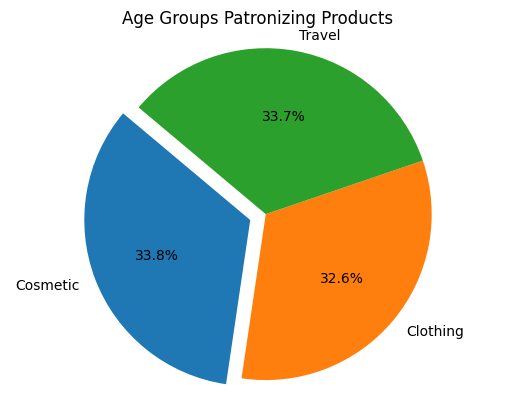

In [30]:
# Create a pie chart to visualize the results
labels = ['Cosmetic', 'Clothing', 'Travel']
sizes = [grouped_data['Travel'].max(), grouped_data['Clothing'].max(), grouped_data['Cosmetic'].max()]
explode = (0.1, 0, 0)  # Explode the 1st slice (Cosmetic)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Age Groups Patronizing Products')

plt.show()

#### Question 3
 - Which date had the highest patronage for Clothing?

In [31]:
# List of categories you want to analyze
categories_to_analyze = ['Cosmetic', 'Clothing', 'Travel' , 'Electronics' , 'Market', 'Restaurant']

# Iterate through the categories
for category in categories_to_analyze:
    # Filter the data for the specific category
    category_data = customer_transactions[customer_transactions['Category'] == category]
    
    # Group the data by date and count the number of purchases for each date
    date_patronage = category_data.groupby('Date').size()
    
    # Find the date with the highest patronage for the category
    date_with_highest_patronage = date_patronage.idxmax()
    highest_patronage_count = date_patronage.max()
    
    print(f"For the '{category}' category:")
    print(f"The date with the highest patronage is {date_with_highest_patronage} with {highest_patronage_count} purchases.")
    print()


For the 'Cosmetic' category:
The date with the highest patronage is 2023-01-06 with 41 purchases.

For the 'Clothing' category:
The date with the highest patronage is 2023-04-14 with 44 purchases.

For the 'Travel' category:
The date with the highest patronage is 2023-07-01 with 48 purchases.

For the 'Electronics' category:
The date with the highest patronage is 2023-02-09 with 46 purchases.

For the 'Market' category:
The date with the highest patronage is 2023-02-02 with 41 purchases.

For the 'Restaurant' category:
The date with the highest patronage is 2023-05-15 with 46 purchases.



 #### Question 4
 - What is the total number of person based on their gender patronized restaurant?

In [32]:
# Filter the data for the "Restaurant" category
restaurant_data = customer_transactions[customer_transactions['Category'] == 'Restaurant']

# Group the data by gender and count the number of patrons for each gender
gender_patrons = restaurant_data['Gender'].value_counts()

print("Total number of people who patronized the restaurant based on gender:")
print(gender_patrons)


Total number of people who patronized the restaurant based on gender:
Gender
Female       3833
Male         3694
Undefined     886
Name: count, dtype: int64


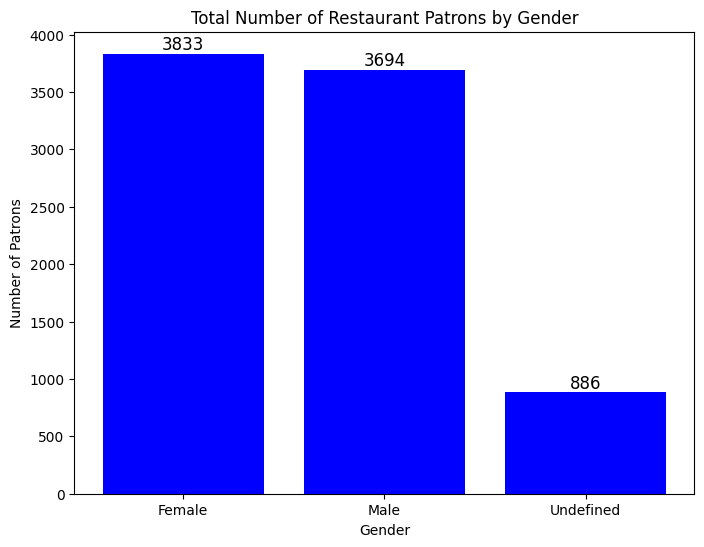

In [33]:
# Create a bar chart to visualize the results
gender_labels = gender_patrons.index
patron_counts = gender_patrons.values

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, patron_counts, color='blue')
plt.title('Total Number of Restaurant Patrons by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patrons')

# Annotate the bars with counts
for i, count in enumerate(patron_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

 #### Question 5
 - What is the trend in the transactions?

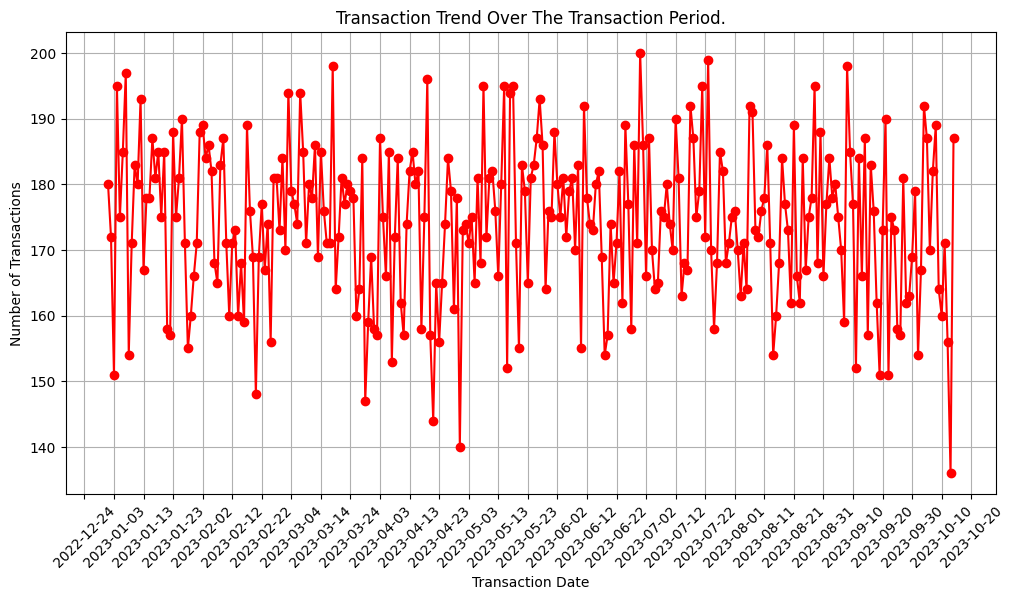

In [34]:
# Convert the 'transaction_date' column to a datetime object
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])

# Group the data by transaction date and count the number of transactions for each date
transaction_trend = customer_transactions.groupby('Date').size()

# Create a line chart to visualize the transaction trend
plt.figure(figsize=(12, 6))
plt.plot(transaction_trend.index, transaction_trend.values, marker='o', color='red')
plt.title('Transaction Trend Over The Transaction Period.')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Optionally, format the x-axis labels for date
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=10))  # Adjust the interval as needed

plt.xticks(rotation=45)

plt.show()

In [35]:
# Convert the 'transaction_date' column to a datetime object
customer_transactions['Date'] = pd.to_datetime(customer_transactions['Date'])

# Group the data by transaction date and count the number of transactions for each date
transaction_counts_by_date = customer_transactions.groupby('Date').size()
date_with_lowest_transactions = transaction_counts_by_date.idxmin()

# Group the data by category and count the number of patrons for each category
category_patronage = customer_transactions['Category'].value_counts()
category_with_lowest_patronage = category_patronage.idxmin()

print(f"The date with the lowest number of transactions is {date_with_lowest_transactions}")
print(f"The category with the lowest patronage is {category_with_lowest_patronage}")


The date with the lowest number of transactions is 2023-10-13 00:00:00
The category with the lowest patronage is Cosmetic


 #### Question 6
 - What is the percentage for the various gender? 

In [36]:
#value counts for each gender

customer_transactions['Gender'].value_counts()

Gender
Female       22713
Male         22240
Undefined     5047
Name: count, dtype: int64

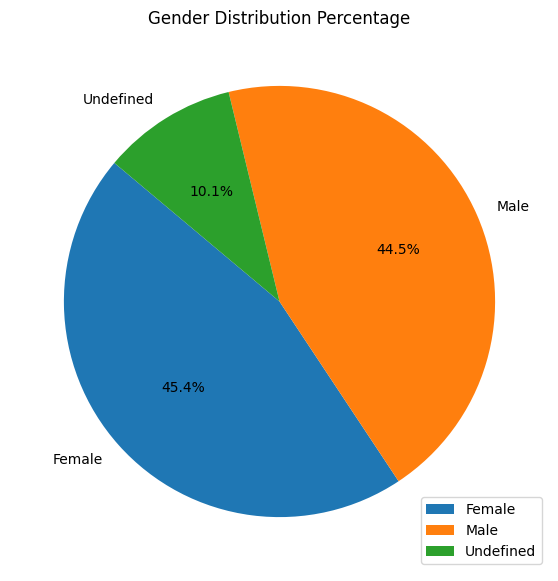

In [37]:
# Assuming your DataFrame has a 'Gender' column, you can count the number of transactions for each gender
gender_counts = customer_transactions['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution Percentage')

# Add a legend
plt.legend()

plt.show()

In [38]:
# Group by "Age Group" and count the number of each gender within each age group
age_gender_distribution = customer_transactions.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Display the age-gender distribution
print(age_gender_distribution)

Gender      Female   Male  Undefined
Age Group                           
Young         4767   4652       1106
Middle Age    7736   7521       1695
Old          10210  10067       2246


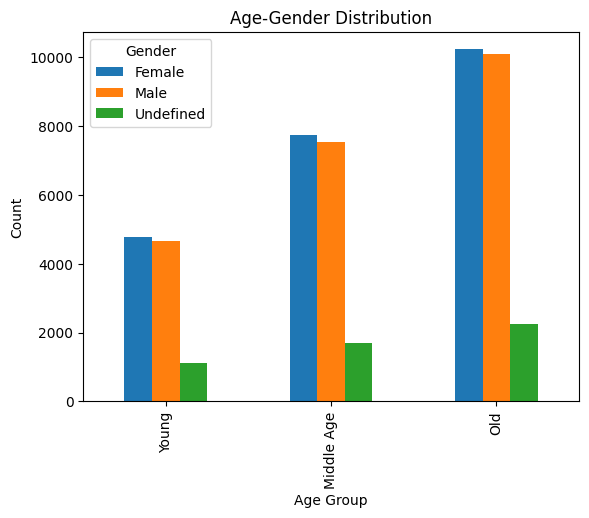

In [39]:
# Plot the age-gender distribution as a bar chart
age_gender_distribution.plot(kind='bar')
plt.title('Age-Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

 #### Question 7
 - Which merchant name had the highest number of transactions during the period?

In [40]:
# Group the data by the merchant and count the number of transactions for each merchant

merchant_transaction_counts = customer_transactions['Merchant Name'].value_counts()

merchant_with_highest_transactions = merchant_transaction_counts.idxmax()

highest_transaction_count = merchant_transaction_counts.max()

print(f"The merchant with the highest number of transactions is '{merchant_with_highest_transactions}'")
print()
print(f"They have {highest_transaction_count} transactions.")

The merchant with the highest number of transactions is 'Smith Ltd'

They have 69 transactions.
